# Exercício 2.2
Utilizando dataset do arquivo circulos.csv faça a clusterização utilizando k-means e DBSCAN.  
Faça a plotagem da clusterização gerada (com cores diferentes para cada cluster).  

* a) Qual é a melhor quantidade de Clusters?
* b) Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa clusterização?

In [68]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import seaborn as sb
from itertools import cycle
from sklearn import datasets
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors

## Importando, analisando, entendendo e tratando os dados

In [69]:
# Importando os dados
data = pd.read_csv('bases/circulos.csv', usecols=['X', 'Y']) # , encoding='cp850', sep=';') 
# O enconding foi escolhido na tentativa e erro (pode ainda estar errado)
print(data)

             X         Y
0    -0.262199  0.456958
1    -0.955271 -0.377646
2     0.119759  1.004204
3    -0.817525 -0.636813
4     0.341931  0.408966
...        ...       ...
1495  0.239832 -0.439170
1496 -0.548693 -0.893268
1497  0.303995 -0.417823
1498 -0.291414  0.436425
1499  0.517285  0.120538

[1500 rows x 2 columns]


In [70]:
# Analisando se existem valores faltantes
print(data.info(),'\n')

# Analisando a composição das variáveis numéricas
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1500 non-null   float64
 1   Y       1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None 

                 X            Y
count  1500.000000  1500.000000
mean     -0.000587     0.001474
std       0.559950     0.560877
min      -1.116100    -1.087399
25%      -0.436690    -0.438517
50%      -0.009070    -0.004835
75%       0.437952     0.444587
max       1.108098     1.080646


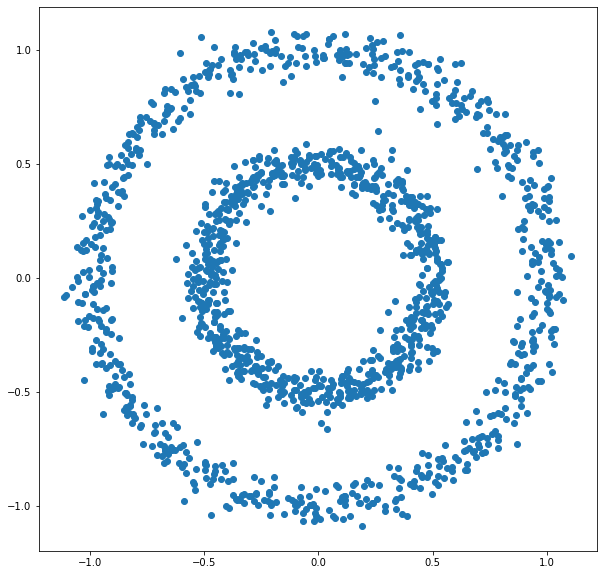

In [71]:
plt.figure(1, figsize=(10,10))
plt.scatter(data['X'],data['Y'])
plt.show();

In [72]:
# Normalizando os datos pelo método de minmax 
data_norm = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(data.loc[:,['X', 'Y']]), columns=['X', 'Y'])

## K-Means

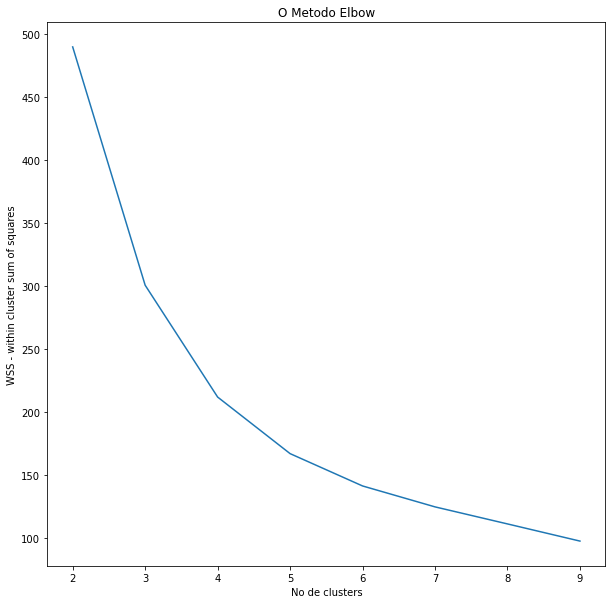

In [73]:
#Método Elbow para encontrar o melhor valor de k
inertias =[]
range_n_clusters = range(2, 10)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i).fit(data_norm)
    #somatório dos erros quadráticos das instâncias de cada cluster
    inertias.append(kmeans.inertia_)

plt.figure(2, figsize=(10,10))
plt.plot(range_n_clusters, inertias)
plt.title('O Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

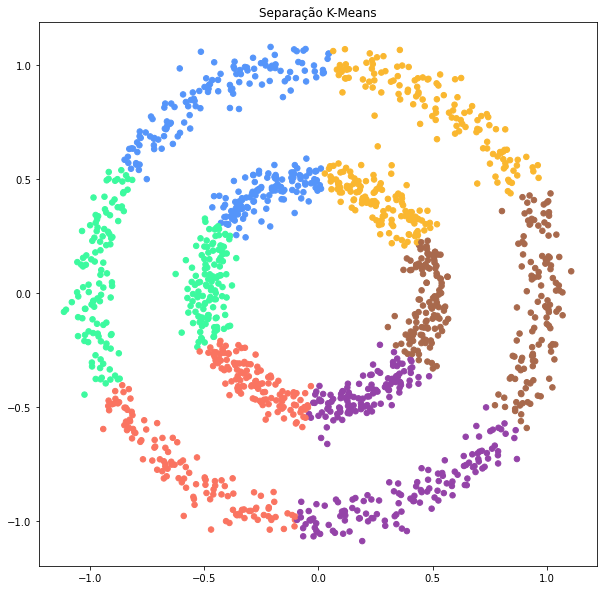

In [74]:
kdata = data_norm.copy()
# A partir do gráfico acima percebemos o que o númedo ideal de clusters está entre 5 e 6, escolhemos o 6 para nosso caso.
kmeans = KMeans(n_clusters = 6)
kmeans.fit(kdata[['X', 'Y']])

colormap=np.array(['#5595FA','#FA7461','#9443A8', '#FAB72F', '#3CFA9F', '#A8694C'])

plt.figure(3, figsize=(10,10))
plt.scatter(data['X'], data['Y'], c=colormap[kmeans.labels_], s=30)

plt.title('Separação K-Means')
plt.show()

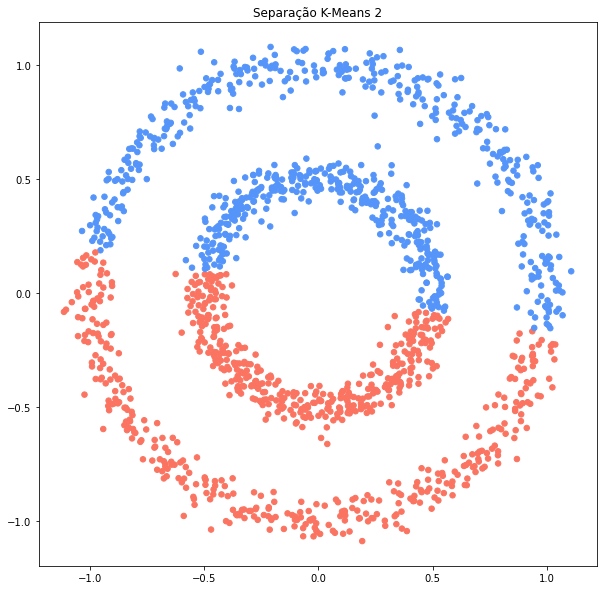

In [75]:
# Tentando efetuar a separação esperada em 2 clusters 
kdata = data_norm.copy()

kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(kdata[['X', 'Y']])

colormap=np.array(['#5595FA','#FA7461','#9443A8', '#FAB72F', '#3CFA9F', '#A8694C'])

plt.figure(4, figsize=(10,10))
plt.scatter(data['X'], data['Y'], c=colormap[kmeans2.labels_], s=30)

plt.title('Separação K-Means 2')
plt.show()

## DBSCAN

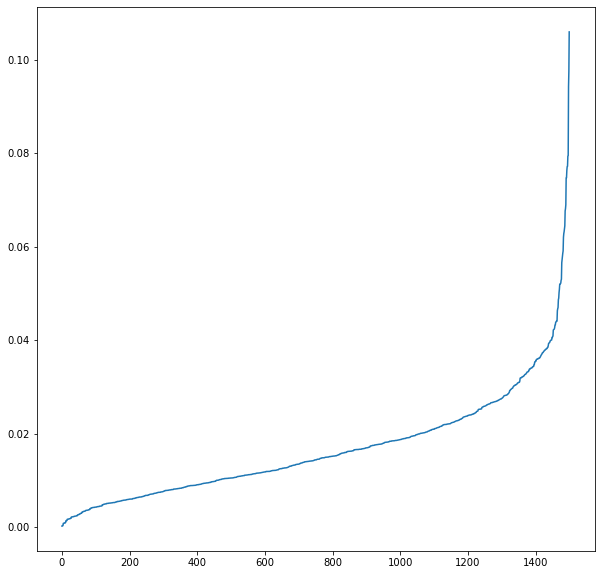

In [76]:
#Selecionando o melhor valor para o eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_norm)
distances, indices = nbrs.kneighbors(data_norm)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(5, figsize=(10,10))
plt.plot(distances);

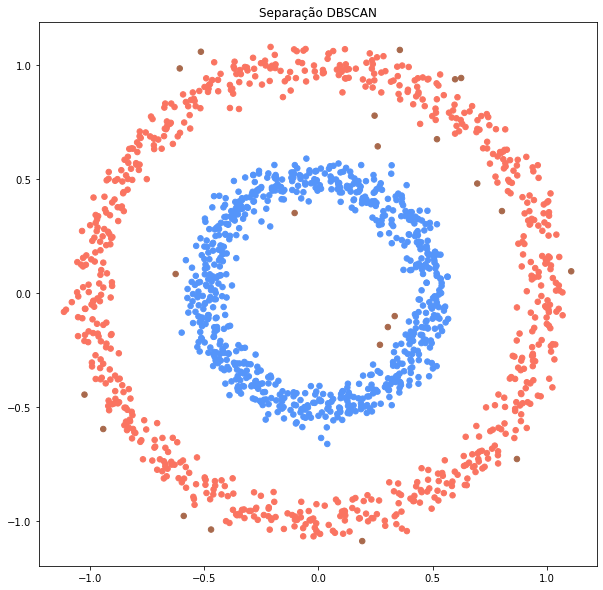

In [77]:
dbsdata = data_norm.copy()

db = DBSCAN(eps=0.06, min_samples=3).fit(dbsdata)


colormap=np.array(['#5595FA','#FA7461','#9443A8', '#FAB72F', '#3CFA9F', '#A8694C'])
vectorizer = np.vectorize(lambda x: colormap[x % len(colormap)])

plt.figure(6, figsize=(10,10))
plt.scatter(data['X'], data['Y'], c=vectorizer(db.labels_), s=30)

plt.title('Separação DBSCAN')
plt.show();


## a) Qual é a melhor quantidade de Clusters?
Pela análise do scatter plot dos dados notamos que o número ideal de clusters é 2, um para o circulo externo e outro parao circulo interno.

## b) Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa clusterização?
Para este conjunto de dados o método DBSCAN é melhor, poisd apenas ele conseguiu efetuar a clusterização esperada separando os dados conforme descrito na questão anterior.